In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import metrics
%matplotlib inline

In [8]:
column_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
location = '../datasets/pima-indians-diabetes.csv'

In [10]:
pima = pd.read_csv(location, names=column_names)

In [11]:
pima.shape

(768, 9)

In [12]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## No of patients with diabetes

In [14]:
pima[pima['label'] == 1].shape

(268, 9)

## No of patients without diabetes

In [15]:
pima[pima['label'] == 0].shape

(500, 9)

In [18]:
features = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
label = ['label']
X = pima[features]
Y = pima[label]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [27]:
X_train.shape

(576, 8)

In [28]:
X_test.shape

(192, 8)

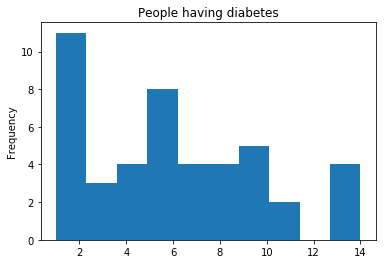

In [39]:
pima[pima['label'] == 1]['age'].value_counts().plot.hist(title='People having diabetes')

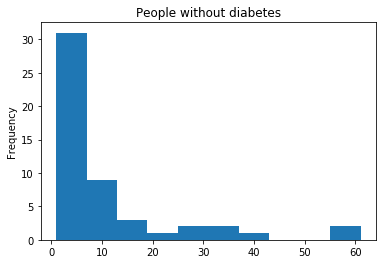

In [40]:
pima[pima['label'] == 0]['age'].value_counts().plot.hist(title='People without diabetes')

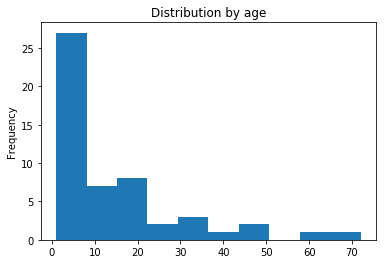

In [41]:
pima['age'].value_counts().plot.hist(title='Distribution by age')

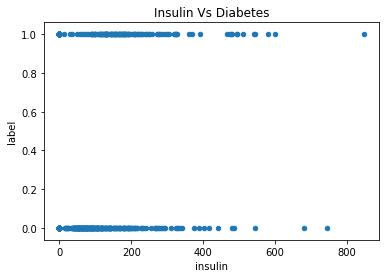

In [43]:
pima.plot.scatter(x='insulin', y='label', title='Insulin Vs Diabetes')

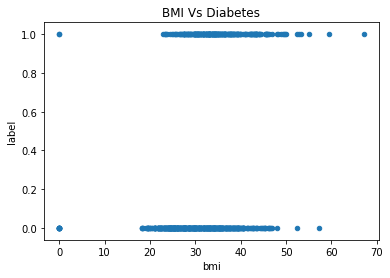

In [46]:
pima.plot.scatter(x='bmi', y='label', title='BMI Vs Diabetes')

In [47]:
pima.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logres = LogisticRegression()
logres.fit(X_train, Y_train)
y_pred = logres.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
cv_score = metrics.accuracy_score(Y_test, y_pred)

In [61]:
print (cv_score*100)

80.72916666666666


In [62]:
Y_test.mean()

label    0.322917
dtype: float64

In [65]:
Y_test['label'].value_counts()

0    130
1     62
Name: label, dtype: int64

## Confusion Matrix

In [66]:
print (metrics.confusion_matrix(Y_test, y_pred))

[[119  11]
 [ 26  36]]


In [67]:
confusion = metrics.confusion_matrix(Y_test, y_pred)
tp = confusion[1,1]
tn = confusion[0,0]
fp = confusion[0,1]
fn = confusion[1,0]

## Metrics computed from Confusion Matrix

### Classification Accuracy 

In [68]:
# (tp+tn)/(tp+fp+tn+fn)
metrics.accuracy_score(Y_test, y_pred)

0.8072916666666666

### Classification Error

In [69]:
1-metrics.accuracy_score(Y_test, y_pred)

0.19270833333333337

In [70]:
print (metrics.recall_score(Y_test, y_pred))

0.5806451612903226
